In [1]:
## Imports
import preprocess as pp
import h5py
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import random
import scipy.stats as stats
import string
import numpy as np
import matplotlib
from scipy.spatial import ConvexHull  
import ot 
from scipy.spatial import distance_matrix
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

### WT (Healthy), HD(Disease) and PDE10i treated HD (Drug treated) empirical Data 

In [2]:
# HD data; Source Beaumont et al., 2016 
data_hd = {'Rh':[70,140,90,160,140,120,150,170,160,150,150],
'IR':[220,233,232,160,171,182,149,158,164,127,160],
'Vm':[-72,-74,-78,-73,-80,-77,-79,-77,-75,-77,-78]} 

#emp represents empirical data
df_emp_hd = pd.DataFrame(data_hd) 

# WT data; 
data_wt = {'Vm':[-84,-90,-80,-84,-78,-82,-78,-80,-81,-80,-80], 
        'IR':[88,94,116,105,88,88,103,114,102,100,96], 
        'Rh':[210,120,270,120,140,180,370,180,230,200,230]} 

df_emp_wt = pd.DataFrame(data_wt) 

#HD treated with PDE10i Data
data_pd = {'Rh':[90,170,70,160,140,100,130,120,260,130,200],
'IR':[149,106,104,107,103,131,112,96,94,70,107],
'Vm':[-79,-83,-82,-81,-79,-77,-80,-78,-82,-78,-81]} 
   
# Dict to DataFrame  
df_emp_pd = pd.DataFrame(data_pd) 

### Convex Hull Computation

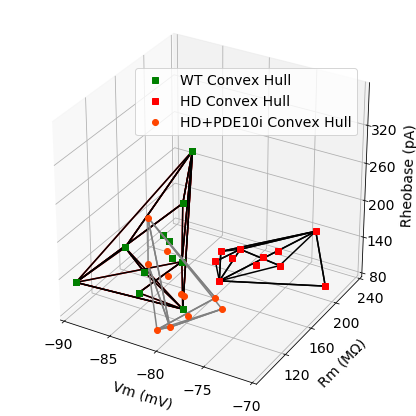

In [7]:
fig = plt.figure(figsize = (6, 6))
fs=14
matplotlib.rcParams.update({'font.size': fs})
ax = fig.add_subplot(111,projection='3d')

#WT population

points1=np.array([[-84,88,210],[-90,94,120],[-80,116,270],[-84,105,120],[-78,88,140],[-82,88,180],[-78,103,370],[-80,114,180],[-81,102,230],[-80,100,200],[-80,96,230]])

hull1=ConvexHull(points1)

edges= list(zip(*points1))
for i in hull1.simplices:
    ax.plot(points1[i,0], points1[i,1], points1[i,2], 'r-')
ax.plot(edges[0],edges[1],edges[2],'ks') 


# HD population
data_hd = {'Rh':[70,140,90,160,140,120,150,170,160,150,150],
'IR':[220,233,232,160,171,182,149,158,164,127,160],
'Vm':[-72,-74,-78,-73,-80,-77,-79,-77,-75,-77,-78]} 

points2=np.array([[-72,220,70],[-74,233,140],[-78,232,90],[-73,160,160],[-80,171,140],[-77,182,120],[-79,149,150],[-77,158,170],[-75,164,160],[-77,127,150],[-78,160,150]])

hull2=ConvexHull(points2)

#HD treated with PDE10i population
points3=np.array([[-79,149,90],[-83,106,170],[-82,104,70],[-81,107,160],[-79,103,140],[-77,131,100],[-80,112,130],[-78,96,120],[-82,94,260],[-78,70,130],[-81,107,200]])    

hull3=ConvexHull(points3)

edges1= list(zip(*points1))
for i in hull1.simplices:
    ax.plot(points1[i,0], points1[i,1], points1[i,2], 'k-')
  

ax.plot(edges1[0],edges1[1],edges1[2],'gs',label='WT Convex Hull') 
ax.legend() 

edges2= list(zip(*points2))
for i in hull2.simplices:
    ax.plot(points2[i,0], points2[i,1], points2[i,2], 'k-')
 

ax.plot(edges2[0],edges2[1],edges2[2],'rs',label='HD Convex Hull') 
ax.legend()

edges3= list(zip(*points3))
for i in hull3.simplices:
    ax.plot(points3[i,0], points3[i,1], points3[i,2], 'grey')
   
ax.plot(edges3[0],edges3[1],edges3[2],'bo',label='HD+PDE10i Convex Hull',color='orangered')    
ax.legend() 

ax.set_xlim([-90,-70]), ax.set_xticks([-90,-85,-80,-75,-70]) ,ax.set_xlabel('\n Vm (mV)',fontsize=fs)
ax.set_zlim([80, 380]),ax.set_zticks([80,140,200,260,320]) ,ax.set_zlabel('\n Rheobase (pA)',fontsize=fs)
ax.set_ylim([80, 240]),ax.set_yticks([120,160, 200, 240]) ,ax.set_ylabel('\n Rm (M$\Omega$)',fontsize=fs)

 
from mpl_toolkits.mplot3d import Axes3D, proj3d
f = lambda x,y,z: proj3d.proj_transform(x,y,z, ax.get_proj())[:2]
ax.legend(loc="upper right", bbox_to_anchor=f(-70,240, 420), 
          bbox_transform= ax.transData)


fig.tight_layout()
#fig.savefig('Fig1A_Preclinical_Data_ConvexHulls.pdf')


## Wasserstein Distance 

In [11]:
#Wasserstein Distance Calculation
class WassersteinPOT:
    def __init__(self):
        self._ot = ot
    def __call__(self, data1, data2):
        if not isinstance(data1, np.ndarray):
            data1 = data1.numpy()
            data2 = data2.numpy()
        M = distance_matrix(data1, data2)
        return self._ot.emd2([], [], M)
 

In [12]:
#WSD between HD and WT values
mobj=WassersteinPOT()
mobj(df_emp_hd.values,df_emp_wt.values)

367.19284410740835

In [13]:
#WSD between PDE10i_treated_HD and WT values
mobj(df_emp_pd.values,df_emp_wt.values)

363.00180894511334

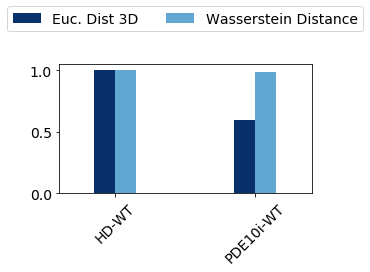

In [10]:
fs=14
matplotlib.rcParams.update({'font.size': fs})
from matplotlib import cm
color_list = cm.Blues(np.linspace(1,0.3,4))


#WT-HD Euclidean Distance
emp_wthd_dist=pp.euclidean_dist(df_emp_wt,df_emp_hd)
#WT-HD Wasserstein Distance
emp_wthd_wsd= mobj(df_emp_wt.values,df_emp_hd.values)
#WT-PDE10i Euclidean Distance
emp_wtpd_dist=pp.euclidean_dist(df_emp_wt,df_emp_pd)
#WT-PDE10i Wasserstein Distance
emp_wtpd_wsd= mobj(df_emp_wt.values,df_emp_pd.values)


#Normalize to the maximal Distance i.e. WT-HD for both Euclidean and Wasserstein
df_emp_metric = pd.DataFrame()
df_emp_metric['Euc. Dist 3D']=[emp_wthd_dist/emp_wthd_dist,emp_wtpd_dist/emp_wthd_dist]
df_emp_metric['Wasserstein Distance']=[emp_wthd_wsd/emp_wthd_wsd,emp_wtpd_wsd/emp_wthd_wsd]
df_emp_metric.index=['HD-WT','PDE10i-WT']

#Generate Figure 
fig=plt.figure(figsize=(5,5))
df_emp_metric.plot(kind='bar',colors=[color_list[0],color_list[2]],ax=fig.gca(),rot=45,width=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.5),ncol=2)
fig.tight_layout()

#fig.savefig('Fig1B_Preclinical_Data_WSDist.pdf')

In [14]:
df_emp_metric

,Euc. Dist 3D,Wasserstein Distance
HD-WT,1.000000,1.000000
PDE10i-WT,0.599203,0.988586


##  J-S Distance

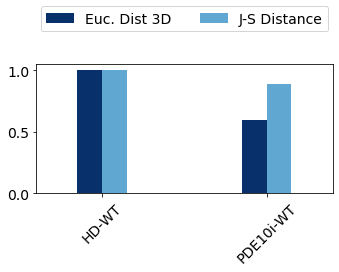

In [9]:
from matplotlib import cm
color_list = cm.Blues(np.linspace(1,0.3,4))

emp_wthd_dist=pp.euclidean_dist(df_emp_wt,df_emp_hd)
emp_wthd_div=pp.divergence(df_emp_wt,df_emp_hd)

emp_wtpd_dist=pp.euclidean_dist(df_emp_wt,df_emp_pd)
emp_wtpd_div=pp.divergence(df_emp_wt,df_emp_pd)

df_emp_metric = pd.DataFrame()

df_emp_metric['Euc. Dist 3D']=[emp_wthd_dist/emp_wthd_dist,emp_wtpd_dist/emp_wthd_dist]
df_emp_metric['J-S Distance']=[emp_wthd_div/emp_wthd_div,emp_wtpd_div/emp_wthd_div]


df_emp_metric.index=['HD-WT','PDE10i-WT']
df_emp_metric
fig=plt.figure(figsize=(5,5))
df_emp_metric.plot(kind='bar',colors=[color_list[0],color_list[2]],ax=fig.gca(),rot=45,width=0.3)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.5),ncol=2)
fig.tight_layout()


In [5]:
df_emp_metric

,Euc. Dist 3D,J-S Distance
HD-WT,1.000000,1.000000
PDE10i-WT,0.599203,0.876038


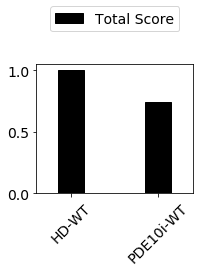

In [7]:
df_emp_metric['Total Score'] = (df_emp_metric.iloc[:,0] + df_emp_metric.iloc[:,1])/2
fig=plt.figure(figsize=(3,5))
df_emp_metric[['Total Score']].plot(kind='bar',ax=fig.gca(),colors=['k'],edgecolor='k',hatch='/',rot=45,width=0.3)
#plt.ylabel('Normalized Score')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.5))
fig.tight_layout()
